# Calculus and probability in Sympy
Working with densities involves calculus which can sometimes be time-consuming. This course gives you two ways of reducing the amount of calculus involved.
- Probabilistic methods can help reduce algebra and calculus. You've seen this with algebra in the discrete case. You'll see it with calculus as we learn more about densities.
- Python has a symbolic math module called ```SymPy``` that does algebra, calculus, and much other symbolic math. In this section we will show you how to do calculus using ```SymPy```.

We will demonstrate the methods in the context of an example. Suppose $X$ has density given by

$$
f(x) = \begin{Bmatrix}
105x^2(1-x)^4 & \text{ if } 0 \leq x \leq 1 \\
0 & \text{otherwise} \\
\end{Bmatrix}
$$

As you can see from its graph below, $f$ could be used to model the distribution of a random proportion that you think is likely to be somewhere between 0.2 and 0.4.

#### insert graph

The density $f$ is a polynomial on the unit interval, and in principle the algebra and calculus involved in integrating it are straightforward. But they are tedious. So let's get ```SymPy``` to do the work.

First, we will import all the functions in ```SymPy``` and set up some printing methods that make the output look nicer than the retro typewritten pgf output you saw in a previous section. In future sections of this text, you can assume that this importing and initialization will have been done at the start.

In [12]:
from sympy import *
from sympy import symbols
init_printing()
from Cython import declare

In [13]:
n, c, t, x, y, z = symbols("n, c, t, x, y, z")

Next, we have to tell Python which variables are symbolic and what their possible values are. The function ```declare``` lets us do this. It takes as its arguments the string representing the variable, and an option ```interval``` specifying the interval of possible values of the variable. In our example, the variable $x$ takes values in the unit interval. In later examples we will show you how to declare infinite intervals of possible values.

In [14]:
declare('x', interval=(0, 1))

Now we will assign the name ```density``` to the expression that defines $f$. The expression looks just like a numerical calculation, but the output is algebraic!

In [15]:
density = x/2
density

That's the density $f$ defined by the equation at the start of the section. Notice that what we naturally think of as $1−x$ is expressed as $−x+1$. That's because ```SymPy``` is writing the polynomial leading with the term of highest degree.

Let's not simply accept that this function is a density. Let's check that it is a density by integrating it from 0 to 1. To do this, we use the method ```Integral``` that takes the name of a function and a *tuple* (a sequence in parentheses) consisting of the variable of integration and the lower and upper limits of integration. We have assigned this integral to the name ```total_area```

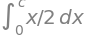

In [16]:
total_area = Integral(density, (x, 0, c))
total_area

The output of displays the integral, which is nice, but what we really want is its numerical value. In ```SymPy```, this is achieved by rather rudely instructing the method to ```doit()```.

In [17]:
total_area.doit()

In [28]:
from sympy.stats import Expectation, Normal, Probability, Poisson
from sympy import symbols, Integral, Sum

In [29]:
mu = symbols("mu")
sigma = symbols("sigma", positive=True)
X = Normal("X", mu, sigma)

In [30]:
Expectation(X)

In [31]:
Expectation(X).evaluate_integral().simplify()

This confirms that the function $f$ is a density.

We can use Integral again to find the chance of any interval. Here is $P(0.2<X<0.4)$.

In [ ]:
p_02_04 = Integral(density, (x, 0.2, 0.4)).doit()
p_02_04

For x in the unit interval, the cdf of X is

$$F(x) = P(X≤x) = \int_0^x f(s)ds = I(s) \bigg∣_0^x = I(x)−I(0)$$

where $I$ is the indefinite integral of $f$.

To get the indefinite integral, simply ask ```SymPy``` to integrate the density; there are no limits of integration.

In [ ]:
indefinite = Integral(density).doit()
indefinite

Now $F(x)=I(x)−I(0)$. You can see at a glance that $I(0)=0$ but here is how SymPy would figure that out.

To evaluate $I(0)$, ```SymPy``` must substitute x with 0 in the expression for I. This is achieved by the method ```subs``` that takes the variable as its first argument and the specified value as the second.

In [ ]:
I_0 = indefinite.subs(x, 0)
I_0

In [ ]:
cdf = indefinite - I_0
cdf

To find the value of the cdf at a specified point, say 0.4, we have to substitute $x$ with 0.4 in the formula for the cdf.

In [ ]:
cdf_04 = cdf.subs(x, 0.4)
cdf_04

Thus $P(X \leq 0.4)$ is roughly 58%. Earlier we calculated $P(0.2<X<0.4)=43.2%$, which we can confirm by using the cdf:

In [ ]:
cdf_02 = cdf.subs(x, 0.2)
cdf_04 - cdf_02

The expectation $E(X)$ is a definite integral from 0 to 1:

In [ ]:
expectation = Integral(x*density, (x, 0, 1)).doit()
expectation

Notice how simple the answer is. Later in the course, you will see why.

Here is $E(X^2)$, which turns out to be another simple fraction. Clearly, the density $f$ has interesting properties. We will study them later. For now, let's just get the numerical answers.

In [ ]:
expected_square = Integral((x**2)*density, (x, 0, 1)).doit()
expected_square

Now you can find $SD(X)$.

In [ ]:
sd = (expected_square - expectation**2)**0.5
sd

# jacobian

In [ ]:
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi

In [ ]:
X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
X

In [ ]:
Y = Matrix([rho, phi])
Y

In [ ]:
X.jacobian(Y)

# independence

In [ ]:
# Create the symbols; they are all positive
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)
lamda = Symbol('lamda', positive=True)
mu = Symbol('mu', positive=True)

In [ ]:
# Construct the expression for the joint density
f_X = lamda * exp(-lamda * x)
f_Y = mu * exp(-mu * y)
joint_density = f_X * f_Y
joint_density

In [ ]:
# Display the integral – first x, then y
Integral(joint_density, (x, 0, y), (y, 0, oo))

In [ ]:
# Evaluate the integral
answer = Integral(joint_density, (x, 0, y), (y, 0, oo)).doit()
answer

In [ ]:
# Confirm that it is the same as what we got by integrating in the other order
simplify(answer)